 # Упражнение: Вычисление числа pi с помощью метода Монте-Карло

# Подсчёт pi с использованием метода Монте-Карло

## Формулы
- square area: $s = (2 r)^2$
- circle area: $c = \pi r^2$
- $c/s = (\pi r^2) / (4 r^2) = \pi / 4$
- $\pi = 4 * c/s$

## Изображение для визуализации концепции
![Darts](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)


In [1]:
# Импорт необходимых модулей
import random
import matplotlib.pyplot as plt

In [2]:
# Инициализация количества "бросков"
num_points = 10000


In [3]:
%%prun
# Здесь мы "бросаем дротики" и подсчитываем количество попаданий
points = []
hits = 0
for _ in range(num_points):
    x, y = random.random(), random.random()
    if x*x + y*y < 1.0:
        hits += 1
        points.append((x, y, "black"))
    else:
        points.append((x, y, "purple"))

         30255 function calls in 0.011 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.007    0.007    0.010    0.010 <string>:1(<module>)
    20000    0.002    0.000    0.002    0.000 {method 'random' of '_random.Random' objects}
    10000    0.001    0.000    0.001    0.000 {method 'append' of 'list' objects}
       14    0.000    0.000    0.000    0.000 threading.py:1534(enumerate)
        1    0.000    0.000    0.011    0.011 {built-in method builtins.exec}
       28    0.000    0.000    0.001    0.000 ipkernel.py:770(_clean_thread_parent_frames)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
       14    0.000    0.000    0.000    0.000 {method '__exit__' of '_thread.RLock' objects}
       84    0.000    0.000    0.000    0.000 threading.py:1196(ident)
       56    0.000    0.000    0.000    0.000 {method 'keys' of 'dict' objects}
       28    0.000    0.00

In [29]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %code_wrap  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %lprun  %ls  %lsmagic  %macro  %magic  %mamba  %matplotlib  %micromamba  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  

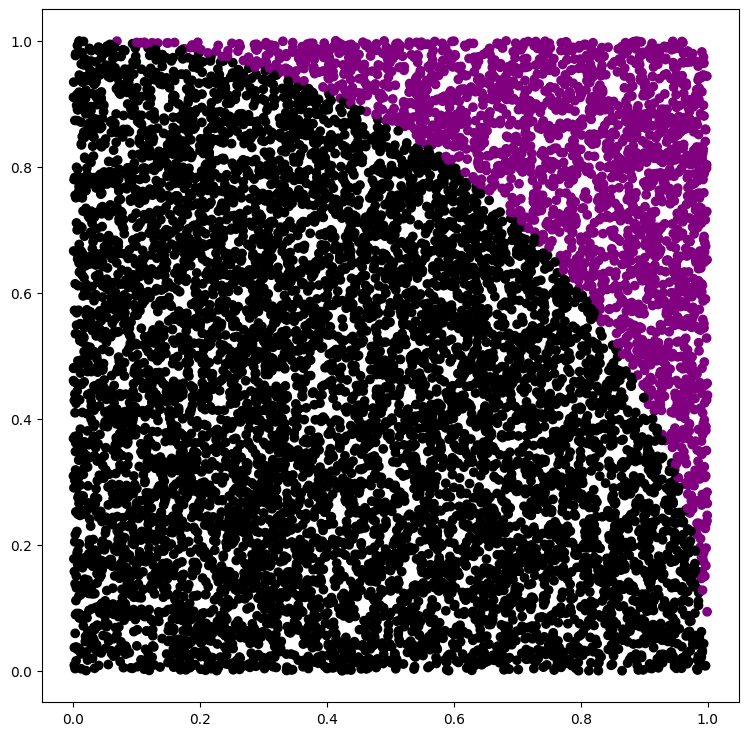

In [4]:
# Распакуем точки в 3 списка
x, y, colors = zip(*points)
# Определяем размеры фигуры
fig, ax = plt.subplots() 
fig.set_size_inches(9.0, 9.0)
# Рисуем результат
ax.scatter(x, y, c=colors)


In [5]:
# Считаем оценку
fraction = hits / num_points
4 * fraction

3.1604

# С добавлением виджета

In [6]:
import random
from ipywidgets import interact, widgets

%matplotlib inline
from matplotlib import pyplot

def throw_darts(num_points):
    points = []
    hits = 0
    for _ in range(num_points):
        x, y = random.random(), random.random()
        if x*x + y*y < 1.0:
            hits += 1
            points.append((x, y, True))
        else:
            points.append((x, y, False))
            fraction = hits / num_points
            pi = 4 * fraction
    return pi, points
    
def create_plot(points):
    x, y, colors = zip(*points)
    # Определяем размеры фигуры
    fig, ax = plt.subplots() 
    fig.set_size_inches(9.0, 9.0)
    ax.scatter(x, y, c=colors)
    
def experiment(num_points):
    pi, points = throw_darts(num_points)
    create_plot(points)
    print("approximation:", pi)

In [7]:
interact(experiment, num_points = widgets.IntSlider(min = 50, max = 10000, step = 10, value = 5000)) 

interactive(children=(IntSlider(value=5000, description='num_points', max=10000, min=50, step=10), Output()), …

<function __main__.experiment(num_points)>

# Виджеты для интерактивной подгонки данных

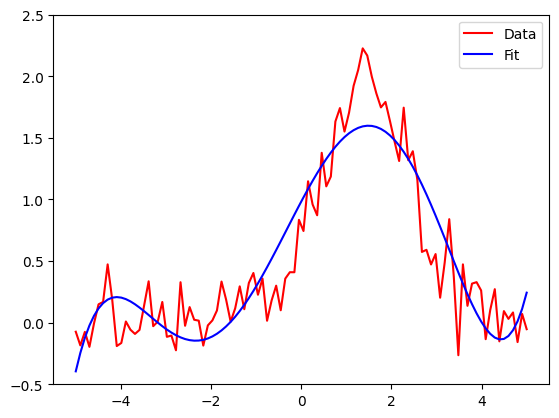

interactive(children=(IntSlider(value=16, description='n', max=30, min=3), Output()), _dom_classes=('widget-in…

In [8]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)
    
def noisy_gaussian():
    # gaussian array y in interval -5 <= x <= 5
    nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y

def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit

def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()

x, y = noisy_gaussian()
yfit = fit(x, y, n=5) # fit a 5th order polynomial to it
plot(x, y, yfit)

@interact
def slider(n = (3, 30)):
    yfit = fit(x, y, n)
    plot(x, y, yfit)


#  Профилирование ячеек

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random

Из функции step убрать import random так как его можно импортировать один раз и всё будет хорошо

In [20]:
def step():
    #import random
    return 1. if random.random() > .5 else -1.

In [21]:
def walk(n):
    x = np.zeros(n)
    dx = 1. / n
    for i in range(n - 1):
        x_new = x[i] + dx * step()
        if x_new > 5e-3:
            x[i + 1] = 0.
        else:
            x[i + 1] = x_new
    return x

In [22]:
n = 100000
x = walk(n)

Text(0, 0.5, 'Значение')

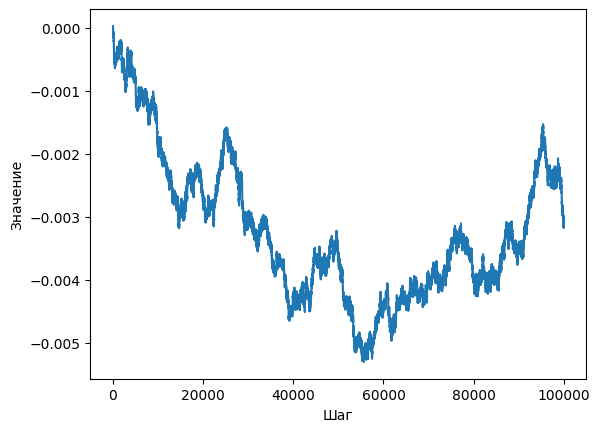

In [23]:
import matplotlib.pyplot as plt
plt.plot(x);
plt.xlabel("Шаг")
plt.ylabel("Значение")

In [24]:
t1 = %timeit -o walk(n)

31.5 ms ± 1.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
t1.best

0.029007319999982427

In [26]:
%%prun
walk(n)

         200076 function calls in 0.082 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.037    0.037    0.064    0.064 2505900611.py:1(walk)
    99999    0.024    0.000    0.035    0.000 3060230482.py:1(step)
    99999    0.011    0.000    0.011    0.000 {method 'random' of '_random.Random' objects}
        2    0.009    0.005    0.016    0.008 {method '__exit__' of 'sqlite3.Connection' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 {built-in method numpy.zeros}
        2    0.000    0.000    0.000    0.000 traitlets.py:3631(set)
        1    0.000    0.000    0.064    0.064 <string>:1(<module>)
        1    0.000    0.000    0.064    0.064 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 traitlets.py:1527(_notify_observers)
        2    0.000    0.000    0.000    0.000 traitlets

# Установка команды для профилирования строк

In [27]:
!pip install line_profiler
%load_ext line_profiler
%lprun?

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Docstring:
Execute a statement under the line-by-line profiler from the
line_profiler module.

Usage:

    %lprun -f func1 -f func2 <statement>

The given statement (which doesn't require quote marks) is run via the
LineProfiler. Profiling is enabled for the functions specified by the -f
options. The statistics will be shown side-by-side with the code through the
pager once the statement has completed.

Options:

-f <function>: LineProfiler only profiles functions and methods it is told
to profile.  This option tells the profiler about these functions. Multiple
-f options may be used. The argument may be any expression that gives
a Python function or method object. However, one must be careful to avoid
spaces that may confuse the option parser.

-m <module>: Get all the functions/methods in a module

One or more -f or -m options are required to get any useful results.

-D <filename>: dump the raw statistics out to a pickle file on disk. The
usual extension for this is ".lprof". These s

In [28]:
%lprun -f walk walk(10000)
%lprun -f step walk(10000)

Timer unit: 1e-07 s

Total time: 0.0066592 s
File: C:\Users\polko\AppData\Local\Temp\ipykernel_2172\3060230482.py
Function: step at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def step():
     2                                               #import random
     3      9999      66592.0      6.7    100.0      return 1. if random.random() > .5 else -1.